<a href="https://colab.research.google.com/github/Martinez-Ortiz-Zaira-Natalia/M-todos-Num-ricos-1/blob/main/Polinomio%20Interpolante%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio interpolante de Newton


In [ ]:
#Importamos las librerias que usaremos
import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, symbols, expand

In [ ]:
# Función para calcular las diferencias de la tabla a partir de los valores de f(x).
#Devuelve una lista de listas, donde cada lista corresponde a un orden de la diferencia
def diferencias_finitas(F):
    n = len(F)
    diferencias = [np.copy(F)]  # El primer conjunto de diferencias es F

    # Calcular las diferencias finitas de orden superior
    for j in range(1, n):
        dif = np.zeros(n-j)
        for i in range(n-j):
            dif[i] = diferencias[j-1][i+1] - diferencias[j-1][i]
        diferencias.append(dif)

    return diferencias


In [ ]:
# Funcion para graficar tanto los puntos de la tabla como el polinomio interpolante.

def graficar_polinomio(x_vals, F, polinomio_func):
    # Crear una malla de x para graficar el polinomio de Newton suavemente
    x_vals_denso = np.linspace(min(x_vals), max(x_vals), 500)
    y_vals_denso = [polinomio_func(x) for x in x_vals_denso]

    # Graficar los puntos de la tabla (x_i, f(x_i))
    plt.scatter(x_vals, F, color="magenta", marker="o", label="Datos Originales")

    # Graficar el polinomio de Newton en color azul
    plt.plot(x_vals_denso, y_vals_denso, color="blue", label="Polinomio Interpolante")

    # Configurar el titulo, etiquetas y leyenda
    plt.title("Gráfico del Polinomio Interpolante con los Datos Originales")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
# Aqui mandamos a guardar los valores de las variables que usaremos
def main():
    # Ingresa el polinomio que va a usar para evaluar los valores de f(x)
    print("\nIngrese el polinomio que va a usar para evaluar los valores de f(x):")
    polinomio_str = input("Ingresa el polinomio (ejemplo: x**3 - 2*x**2 + 3*x + 5): ")

    # Convertir el polinomio de cadena a función simbólica
    x = symbols('x')
    polinomio = sympify(polinomio_str)

    # Mostrar el polinomio original
    print(f"\nEl polinomio que has ingresado es: {polinomio}")

    # Expansión del polinomio (en caso de que el polinomio este factorizado o no esté completamente expandido)
    polinomio_expandido = expand(polinomio)
    print(f"\nEl polinomio expandido es: {polinomio_expandido}")

    # Ingresar los puntos x de la tabla
    print("\nIngrese los puntos (x_i) para los cuales desea evaluar f(x):")
    n = int(input("¿Cuántos puntos de datos tiene la tabla? "))

    x_vals = [] #aqui se almacenan los valores que ingresa el usuario
    F = [] #aqui se almacenan los valores de f(x) que se calcula con el polinomio

    for i in range(n):
        x_i = float(input(f"Ingrese el valor de x_{i+1}: "))
        x_vals.append(x_i)
# Evalua el polinomio en los puntos dados por el usuario
    F = [float(polinomio.subs(x, x_i)) for x_i in x_vals]

    #Mandaremos a llamar lo que realizamos

    # Mostrar la tabla de valores (x, f(x))
    print("\nTabla de Valores de f(x) en los puntos dados:")
    for x_val, f_val in zip(x_vals, F):
        print(f"x = {x_val}, f(x) = {f_val:.2f}")
    # Calcular las diferencias finitas
    diferencias = diferencias_finitas(F)

    # Crear el encabezado dinámicamente
    encabezado = ["x", "f(x)"]  # Las primeras columnas son x y f(x)
    for i in range(1, len(diferencias)):  # Añadir Δy, Δy², Δy³, etc.
        encabezado.append(f"Δy^{i}")

    # Mostrar la tabla de diferencias con encabezado
    print("\nTabla de Diferencias:")
    print("   ".join(encabezado))  # Imprimir el encabezado
    # Mostrar la tabla de diferencias finitas
    for i in range(len(diferencias[0])):
        row = [x_vals[i]]
        for j in range(len(diferencias)):
            if i < len(diferencias[j]):
                row.append(f"{diferencias[j][i]:.2f}")
            else:
                row.append("     ")
        print("   ".join(map(str, row)))

    # Grafica el polinomio con los puntos originales
    graficar_polinomio(x_vals, F, lambda x: float(polinomio.subs(symbols('x'), x)))


Ingrese el polinomio que va a usar para evaluar los valores de f(x):
Ingresa el polinomio (ejemplo: x**3 - 2*x**2 + 3*x + 5): x**3-2*x**2+7*x-5

El polinomio que has ingresado es: x**3 - 2*x**2 + 7*x - 5

El polinomio expandido es: x**3 - 2*x**2 + 7*x - 5

Ingrese los puntos (x_i) para los cuales desea evaluar f(x):
¿Cuántos puntos de datos tiene la tabla? 6
Ingrese el valor de x_1: 0
Ingrese el valor de x_2: 1
Ingrese el valor de x_3: 2
Ingrese el valor de x_4: 3
Ingrese el valor de x_5: 4
Ingrese el valor de x_6: 5

Tabla de Valores de f(x) en los puntos dados:
x = 0.0, f(x) = -5.00
x = 1.0, f(x) = 1.00
x = 2.0, f(x) = 9.00
x = 3.0, f(x) = 25.00
x = 4.0, f(x) = 55.00
x = 5.0, f(x) = 105.00

Tabla de Diferencias:
x   f(x)   Δy^1   Δy^2   Δy^3   Δy^4   Δy^5
0.0   -5.00   6.00   2.00   6.00   0.00   0.00
1.0   1.00   8.00   8.00   6.00   0.00        
2.0   9.00   16.00   14.00   6.00                
3.0   25.00   30.00   20.00                        
4.0   55.00   50.00                

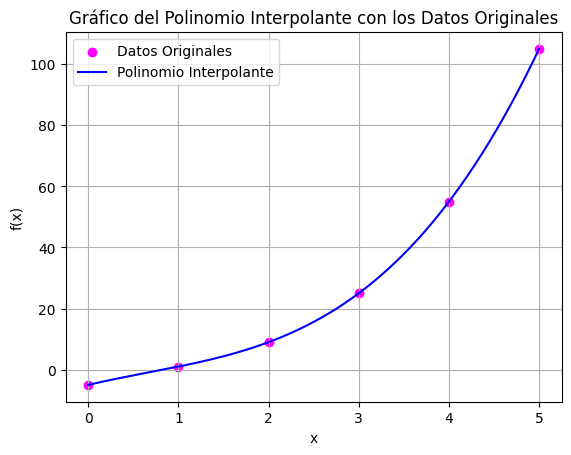

In [ ]:
6#Ejecutamos el programa
if __name__ == "__main__":
    main()


En este codigo ingresamos los puntos x y con el polinomio interpolante de Newton hayamos $y=f(x)$, la tabla tabular (diferencias) y graficamos ambos la grafica y los datos de la tabla.